## Shared Micromobility Vehicle Trips Data Analysis

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [1]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
#import seaborn as sns
import pandas as pd
from sodapy import Socrata

In [2]:
# Output File (CSV)
output_data_file = "Output_Data/shared_mobility.csv"

In [3]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=1000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.head()

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305


In [5]:
# Check for missing values:
results_df.count()

trip_id                   1000000
device_id                 1000000
modified_date             1000000
council_district_start     999996
council_district_end       999996
vehicle_type               999999
trip_duration              999999
trip_distance              999999
start_time                 999999
end_time                   999999
month                      999999
hour                       999999
day_of_week                999999
year                       999999
census_geoid_start         999994
census_geoid_end           999994
dtype: int64

In [6]:
missing_vehicle_type = results_df["vehicle_type"].isnull().sum()
print(f"There are {missing_vehicle_type} missing vehicle types.")
missing_month = results_df["month"].isnull().sum()
print(f"There are {missing_month} missing months.")
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

There are 1 missing vehicle types.
There are 1 missing months.
There are 6 missing census_geoid_start.


### Data Cleaning

In [7]:
clean_results_df = results_df.copy()
clean_results_df

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7824294b-e878-45da-b966-f4c62f0aac88,e47ed6dc-714b-49a0-ad46-badda2c23a2e,2019-06-04T15:02:53.000,9,3,bicycle,1497,4457,2019-06-03T12:00:00.000,2019-06-03T12:15:00.000,6,12,1,2019,48453001100,48453002304
999996,40d06c19-c82a-4cf1-a5e5-f06c971cb799,08fd3ce3-f897-4e98-8eae-244b657c1f36,2019-06-04T15:02:53.000,9,1,scooter,711,2204,2019-06-03T09:00:00.000,2019-06-03T09:15:00.000,6,9,1,2019,48453000604,48453001100
999997,c5ec6974-5022-4294-8ec7-9ba8e9ae72a7,22c086d8-5848-494e-be37-b6e75e497069,2019-06-04T17:02:53.000,9,9,scooter,160,193,2019-06-03T11:15:00.000,2019-06-03T11:15:00.000,6,11,1,2019,48453001100,48453001100
999998,d9919e81-4a77-4c94-b138-15dc3d842cb6,cac2ac36-daec-41a9-a4d1-aab291a8479f,2019-08-09T20:36:29.000,9,3,bicycle,851,3283,2019-08-08T17:15:00.000,2019-08-08T17:30:00.000,8,17,4,2019,48453001100,48453000902


In [8]:
clean_results_df = clean_results_df.rename(columns = {
    "trip_id": "Trip ID",
    "device_id": "Device ID",
    "modified_date": "Data Modified Date",
    "vehicle_type": "Vehicle Type",
    "trip_duration": "Trip Duration",
    "trip_distance": "Trip Distance",
    "start_time": "Trip Start Time",
    "end_time": "Trip End Time",
    "hour": "Hour",
    "day_of_week": "Day Of Week",
    "month": "Month",
    "year": "Year",
    "census_geoid_start": "GEOID Start",
    "census_geoid_end": "GEOID End",
    "council_district_start": "Start Council District",
    "council_district_end" : "Return Council District"
})
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305


In [9]:
#Find the total number of scooter rides:
scooters = clean_results_df[clean_results_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_results_df) - scooters.shape[0]
total_scooters

69363

In [10]:
#Find the total number of bicycle rides:
bicycles = clean_results_df[clean_results_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_results_df) - bicycles.shape[0]
total_bicycles

930638

In [11]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

1000001

In [12]:
# Drop all the null values
clean_results_df = clean_results_df.dropna(how='any')
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28T02:42:07.000,9,9,scooter,644,1326,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28T02:42:07.000,3,1,scooter,419,1511,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453000902,48453000804


In [13]:
# Find the number of unique devices
device_id_list =  clean_results_df["Device ID"].value_counts()
device_id_list

cfe62db9-df8f-42d2-824e-dd160e30c4e2    174
1b58e93f-1f57-42e9-a5e8-adcf4ed193d8    167
ac4e537a-ae29-42ab-ae88-3bd078f5921d    166
2a7bd7e7-545a-4a91-8ab5-265708c7b0af    165
c4f6ae51-b722-4763-a9ef-c58f8e33692b    165
                                       ... 
2487bdc7-9ff3-4ee1-b240-ef7dd759055c      1
9295842d-3fca-4c2d-a89f-217ec4665716      1
e979559c-20c1-4843-843e-5717ce2c7896      1
510b778f-adff-4aae-a1f6-fced4cc32878      1
576e7c05-aee0-4bf1-ac24-174383149908      1
Name: Device ID, Length: 32264, dtype: int64

In [14]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_results_df["GEOID Start"].value_counts()
start_geoid

48453001100    412709
48453000601     67252
48453001305     66864
48453000603     64476
48453000902     61430
                ...  
48453002432         1
48491020703         1
48453001746         1
48453001765         1
48453002212         1
Name: GEOID Start, Length: 187, dtype: int64

In [15]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_results_df["GEOID End"].value_counts()
end_geoid

48453001100    404451
48453000601     76118
48453001305     65603
48453000902     59823
48453000603     57714
                ...  
48491020504         1
48453001857         1
48491020322         1
48453001848         1
48453001913         1
Name: GEOID End, Length: 185, dtype: int64

In [16]:
# Change the time and date format for columns - 'Data Modified Date', 'Trip Start time' and 'Trip End Time'
clean_results_df['Trip Start Time'] = pd.to_datetime(clean_results_df['Trip Start Time'])
clean_results_df['Trip End Time'] = pd.to_datetime(clean_results_df['Trip End Time'])
clean_results_df['Data Modified Date'] = pd.to_datetime(clean_results_df['Data Modified Date'])
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28 02:42:07,1,9,scooter,678,2785,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28 02:42:07,9,5,scooter,713,2466,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28 02:42:07,9,9,scooter,469,1608,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28 02:42:07,9,9,scooter,644,1326,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28 02:42:07,3,1,scooter,419,1511,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453000902,48453000804


### Visualization of the Clean Data Set

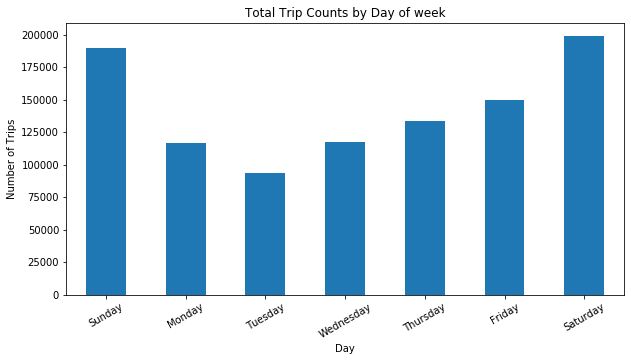

In [20]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(clean_results_df['Day Of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_week.png")
plt.show()